# Stack Overflow Annual Developer Servey

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 데이터 불러오기

In [64]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col='ResponseId')

In [65]:
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"]

In [66]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [67]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [68]:
schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [69]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [70]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

survey_raw_df에 대해 조회할 때 생략되는 column이 없도록 설정

In [71]:
# 표현되는 column과 row의 범위를 변경
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

매우 많은 column이 존재하는데, 이 중 일부만 발췌해서 사용하기   
- 인구 통계(성별, 나이, 학력 등)   
- 프로그래밍 기술, 경험 및 선호도   
- 고용 관련 정보, 선호도 및 의견

In [72]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

얻어진 결과를 survey_raw_df로 부터 분리하여 작업하고자 copy() 메서드를 통해 새롭게 복사

In [73]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [74]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [75]:
print(schema_raw['YearsCode'])

Including any education, how many years have you been coding in total?


value_counts()를 활용해 어떤 값의 유형을 갖는지 확인

In [76]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

## 연습 문제
column(Series)이 NaN 값을 멀마나 갖는지 확인하기 위한 함수를 만들어보자

In [77]:
def count_nan(series):
    return len(series) - len(series.dropna())

# def count_nan(series):
    # return len(series) - series.count()

In [78]:
len(survey_df.YearsCode)

73268

In [79]:
len(survey_df.YearsCode.dropna())

71331

In [80]:
count_nan(survey_df.YearsCode)

1937

## 연습 문제
YearsCode의 'Less than 1 year'의 값은 0으로 변경하고, 'More than 50 years'의 값은 51로 일괄적으로 변경하기.   
dtype을 float으로 변경하고 servey_df["YearsCode"]에 적용해보기

In [81]:
survey_df.YearsCode.unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [82]:
survey_df.YearsCode.replace('Less than 1 year', 0, inplace=True)
survey_df.YearsCode.replace('More than 50 years', 51.0, inplace=True)

In [83]:
survey_df.YearsCode.unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 51.0, '29', '30', '32', 0, '48',
       '45', '38', '39', '28', '23', '43', '21', '41', '35', '50', '33',
       '31', '34', '46', '44', '42', '47', '49'], dtype=object)

In [84]:
survey_df.YearsCode = survey_df.YearsCode.astype(float)

In [85]:
survey_df.YearsCode.unique()

array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 51., 29., 30., 32.,  0., 48., 45., 38., 39., 28.,
       23., 43., 21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47.,
       49.])

YearsCodePro는 교육 기간을 포함하지 않는다는 차이점이 있다.   
즉 순수하게 일한 기간만을 나타내는 설문 항목

In [86]:
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [87]:
count_nan(survey_df.YearsCodePro)

21435

In [88]:
survey_df.YearsCodePro.value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [89]:
survey_df.YearsCodePro.replace('Less than 1 year', 0, inplace=True)
survey_df.YearsCodePro.replace('More than 50 years', 51, inplace=True)
survey_df.YearsCodePro = survey_df.YearsCodePro.astype(float)

In [90]:
survey_df.YearsCodePro.unique()

array([nan,  5., 17.,  3.,  6., 30.,  2., 10., 15.,  4., 22., 20., 40.,
        9., 14., 21.,  7., 18., 25.,  8., 12., 45.,  1., 19., 28., 24.,
       11., 23.,  0., 32., 27., 16., 44., 26., 37., 46., 13., 31., 39.,
       34., 38., 35., 29., 42., 36., 33., 43., 41., 48., 50., 51., 47.,
       49.])

In [91]:
survey_df.YearsCodePro.dtype

dtype('float64')

In [92]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


만약 YearsCode, YearsCodePro에 대한 값 중 "Less than 1 year", "More than 50 years"의 값을   
NaN으로 처리하면서 수치 자료형으로 바꾼다면 아래 보이는 것처럼 to_numeric() 메서드를 사용할 수 있다.

In [93]:
# 이렇게도 가능
survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [94]:
survey_df.YearsCode

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [95]:
survey_df.YearsCodePro

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [96]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

Gender 성별에 대한 칼럼   
다양한 값이 존재한다   
둘 이상의 옵션이 포함된 값을 배제하고 데이터를 다뤄보자

In [97]:
survey_df.Gender.value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

여러 응답 항목을 가진 경우 ;를 포함하고 있다   
contains()의 첫 인자로 포함된 것을 찾을 문자열을 넣어준다.   
na 키워드 인수를 활용하면 NaN 값을 대신할 값을 넣을 수 있다.   
이 메서드를 활용하면 ';'를 포함하는 row를 NaN 값으로 변경할 수 있다.   
'~'은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True와 False를 반전해주는 역할을 한다.

In [98]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

In [99]:
# 성별을 복수 선택한 값을 NaN처리한 결과 확인
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

시각화 설정

In [100]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14    # 기본 폰트의 크기
mpl.rcParams['figure.figsize'] = (9, 5)    # 기본 figure의 사이즈
mpl.rcParams['figure.facecolor'] = '#00000000'    # 기본 figure 내 배경 색상을 흰색으로 적용

In [101]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['/Users/kangjik/Library/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumSquare Neo Regular'
print(mpl.rcParams['font.family'])

NanumSquare Neo OTF Regular
NanumSquare Neo Regular
MesloLGS NF
NanumSquare Neo OTF Light
NanumSquare Neo OTF ExtraBold
NanumSquare Neo variable
NanumSquare Neo OTF Bold
MesloLGS NF
MesloLGS NF
MesloLGS NF
NanumSquare Neo OTF Heavy
['NanumSquare Neo Regular']


In [102]:
mpl.rcParams["axes.unicode_minus"] = False

In [103]:
schema_raw.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [104]:
survey_df.Country.unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [105]:
# 유일한 값의 개수를 확인. NaN값은 포함하지 않음
survey_df.Country.nunique()

180

## 연습 문제
설문 응답자가 속한 국가 중 응답자 수 상위 15개 국가를 구해봐라

In [106]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

## 연습 문제
앞의 연습 문제에서 구한 값을 가지고 차트 작성하기   
- xticks의 글자를 회전시키려면 rotation 키워드 인수에 각도를 의미하는 정수 값을 입력하면 된다.


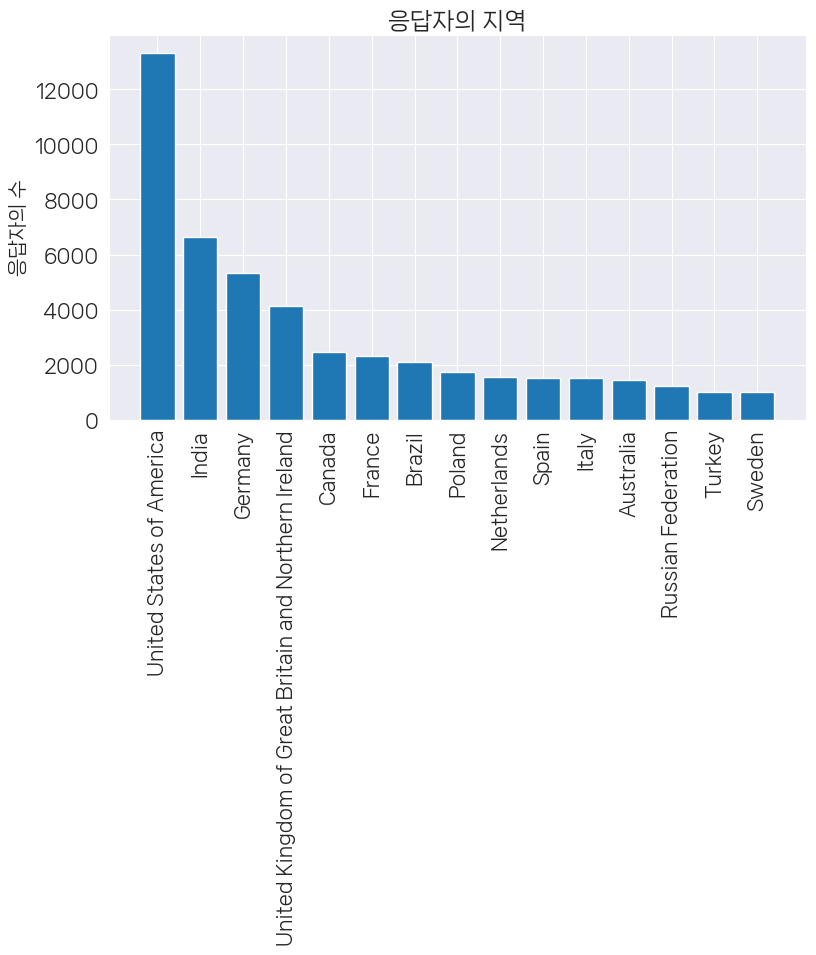

In [120]:
x = top_countries.index
y = top_countries.values
plt.xticks(rotation=90)
plt.title('응답자의 지역')
plt.bar(x, y)
plt.ylabel("응답자의 수")
plt.show()

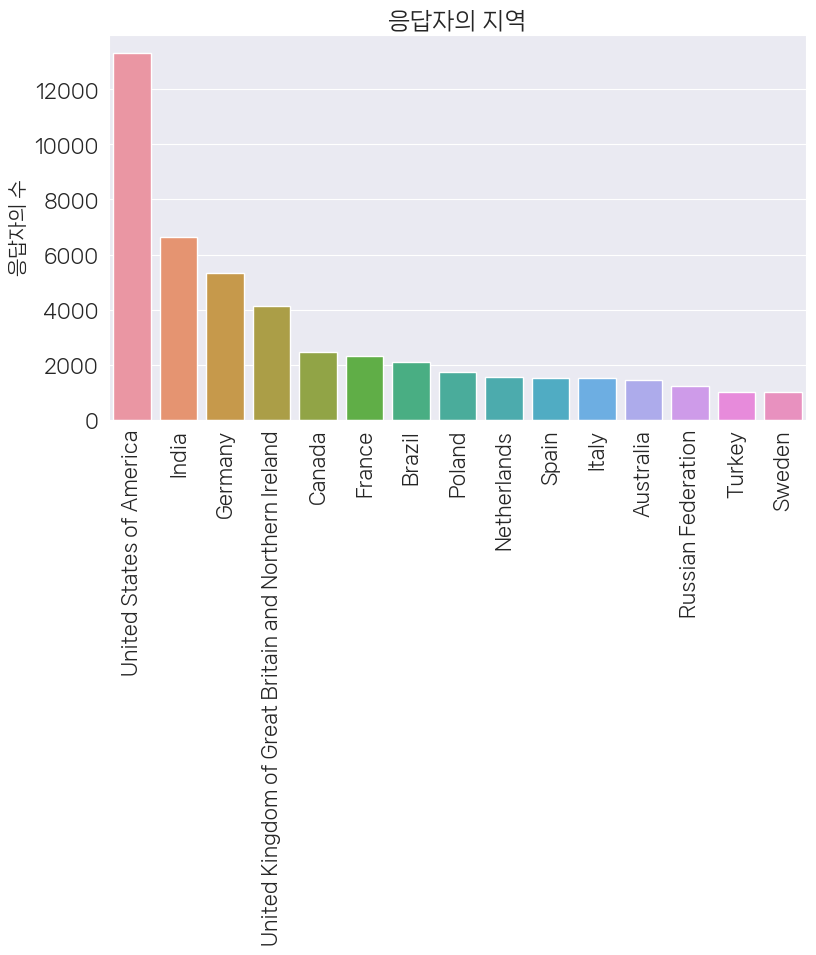

In [119]:
x = top_countries.index
y = top_countries.values
plt.title('응답자의 지역')
plt.xticks(rotation=90)
sns.barplot(x=x, y=top_countries)
plt.ylabel("응답자의 수")
plt.show()

In [122]:
schema_raw.Age

'What is your age?'

In [123]:
count_nan(survey_df.Age)

3011

In [125]:
age_counts = survey_df.Age.value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [126]:
survey_df.Age.unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [127]:
survey_df.Age.nunique()

8

## 연습 문제
연령의 분포가 한눈에 들어오도록 그래프를 출력   
x축의 출력하는 데이터의 순서도 고려하여 작성해야 한다.

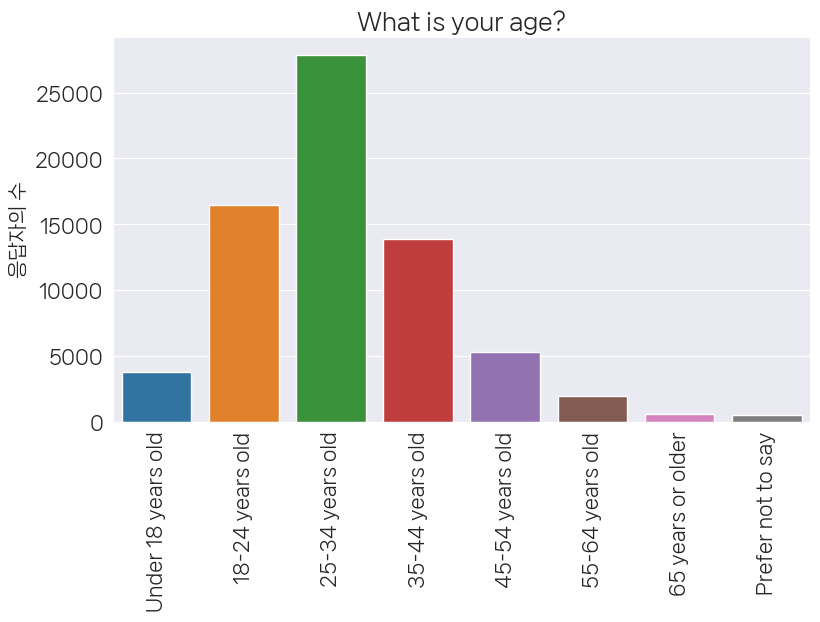

In [139]:
plt.title(schema_raw.Age)
plt.xticks(rotation=90)
sns.barplot(x=age_counts.index,y=age_counts, order=['Under 18 years old', '18-24 years old', '25-34 years old',
                                                    '35-44 years old', '45-54 years old', '55-64 years old',
                                                    '65 years or older', 'Prefer not to say'])
plt.ylabel("응답자의 수")
plt.show()

## 연습 문제
앞의 데이터를 활용해 파이 플롯을 작성해보자

In [175]:
# 다크 테마여서 글씨가 잘 안보이는 경우에
print(plt.style.available)
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [180]:
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함
plt.style.use("default")
mpl.rcParams["axes.facecolor"] = "white"

In [141]:
survey_df.Gender.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            73259, 73260, 73261, 73262, 73263, 73264, 73265, 73266, 73267,
            73268],
           dtype='int64', name='ResponseId', length=73268)

In [153]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [156]:
survey_df.Gender.value_counts().values

array([64607,  3399,  1172,   704,   279])

In [159]:
survey_df.Gender.value_counts().index

Index(['Man', 'Woman', 'Prefer not to say',
       'Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:'],
      dtype='object')

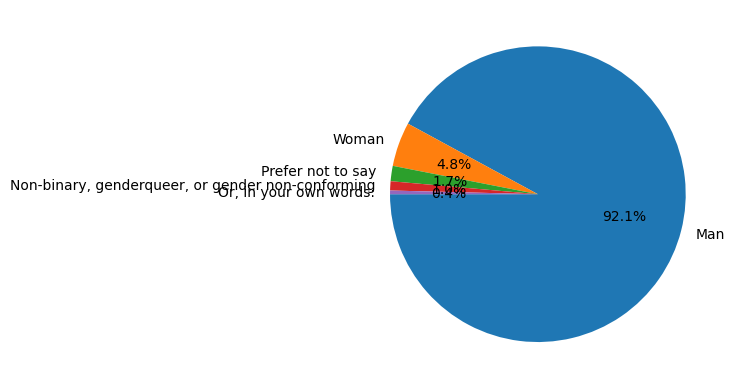

In [182]:
labels = survey_df.Gender.value_counts().index
plt.pie(survey_df.Gender.value_counts(), labels=labels,
        autopct='%1.1f%%', startangle=180)
plt.show()

In [183]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [186]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

## 연습 문제
교육수준 그래프 시각화

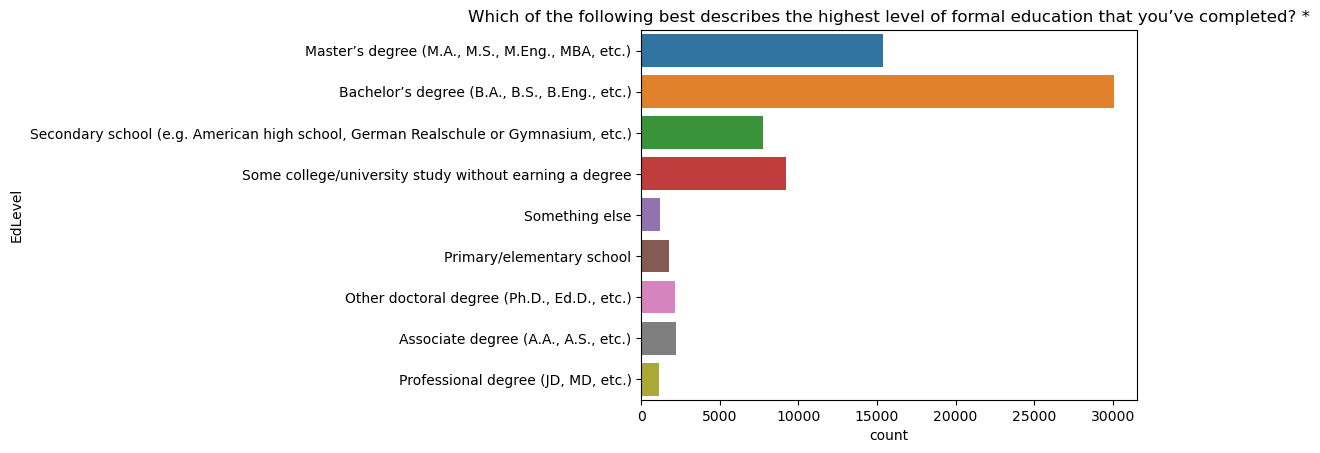

In [199]:
plt.title(schema_raw.EdLevel)
sns.countplot(survey_df, y=survey_df.EdLevel)
plt.show()

## 연습 문제
x축의 단위를 퍼센트로 변경

In [251]:
EdLevel_pct = survey_df.EdLevel.value_counts(True) * 100
EdLevel_pct

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

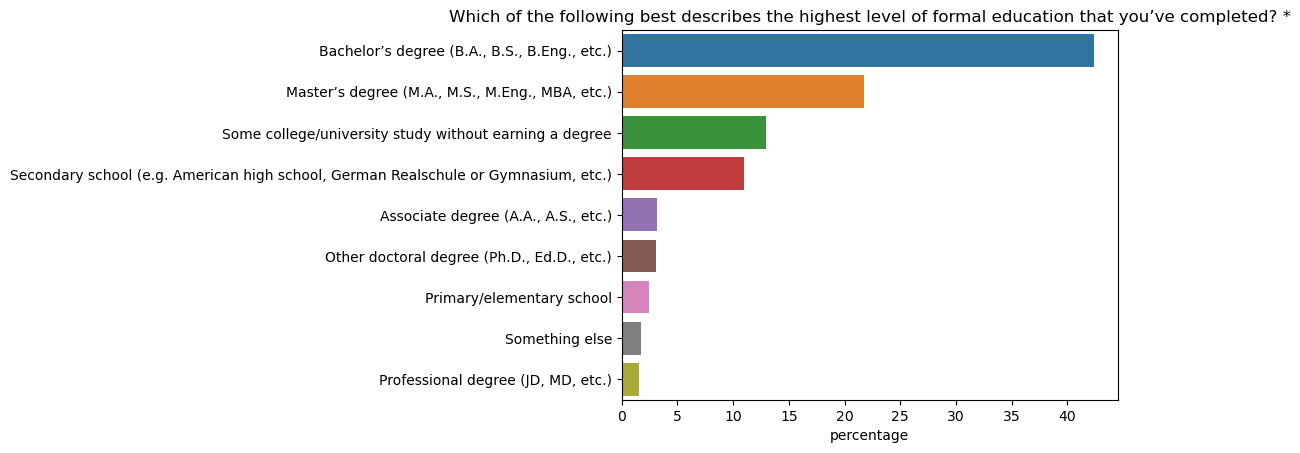

In [252]:
plt.title(schema_raw.EdLevel)
sns.barplot(x=EdLevel_pct, y=EdLevel_pct.index)
plt.xlabel("percentage")
plt.show()

고용 형태 살펴보기

In [253]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

In [254]:
survey_df.Employment.value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

## 연습 문제
고용 형태에 대한 상위 15개 항목에 대한 그래프를 아래와 같이 구현해보세요

In [255]:
survey_df.Employment.value_counts().head(15)

Employed, full-time                                                         42644
Student, full-time                                                           6663
Independent contractor, freelancer, or self-employed                         4941
Employed, full-time;Independent contractor, freelancer, or self-employed     3456
Not employed, but looking for work                                           1810
Student, full-time;Employed, part-time                                       1148
Employed, part-time                                                          1116
Student, part-time                                                           1036
Employed, full-time;Student, full-time                                        961
Employed, full-time;Student, part-time                                        932
Student, part-time;Employed, part-time                                        717
Student, full-time;Not employed, but looking for work                         715
Not employed, an

In [258]:
Emp_pct = survey_df.Employment.value_counts(True) * 100
Emp_pct

Employed, full-time                                                                                               60.045058
Student, full-time                                                                                                 9.381864
Independent contractor, freelancer, or self-employed                                                               6.957195
Employed, full-time;Independent contractor, freelancer, or self-employed                                           4.866235
Not employed, but looking for work                                                                                 2.548578
                                                                                                                    ...    
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                    0.001408
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed     0.001408
Employed

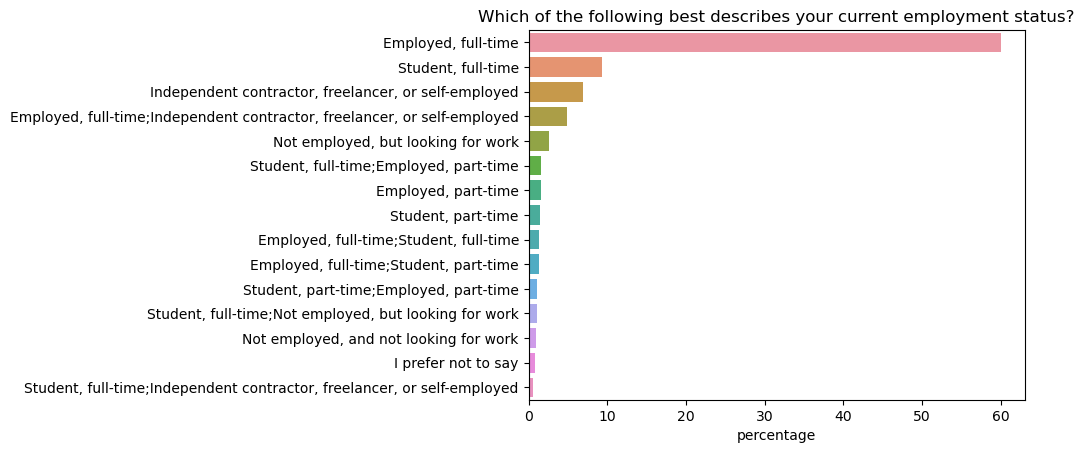

In [262]:
Emp_pct = survey_df.Employment.value_counts(True) * 100
plt.title(schema_raw.Employment)
sns.barplot(x=Emp_pct.head(15), y=Emp_pct.head(15).index)
plt.xlabel("percentage")
plt.show()